In [84]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [85]:
ordinal_ridge = pd.read_csv('Ordinal+Ridge.csv')
ordinal_ridge.shape

(2580, 84)

In [86]:
ordinal_ridge

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Ridge
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,119695.642722
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,118142.328347
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,129798.673755
3,3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,4,535377150,1039,114000,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,106623.231899
4,4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,5,534177230,1665,227000,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,210723.127056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,1.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,759,903205040,952,121000,68.516053,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,117360.049696
2576,2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,760,905402060,1733,139600,68.516053,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,138053.585574
2577,2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,6.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,761,909275030,2002,145000,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,165687.

In [87]:
ordinal_ridge[ordinal_ridge.GrLivArea > 4000]

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Ridge
309,309,10.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,7.0,4.0,4.0,0.0,5.0,3.0,0.0,5.0,5.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,310,908154205,4676,184750,130.0,40094,10,5,2007,2008,762.0,2260.0,0.0,878.0,3138.0,3138,1538,0,1.0,0.0,3,1,3,1,11,1,2007.0,3.0,884.0,208,406,0,0,0,0,0,469678.090737
1007,1007,10.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,6.0,6.0,6.0,1.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,0.0,1.0,9.0,4.0,8,528351010,4316,755000,104.0,21535,10,6,1994,1995,1170.0,1455.0,0.0,989.0,2444.0,2444,1872,0,0.0,1.0,3,1,4,1,10,2,1994.0,3.0,832.0,382,50,0,0,0,0,0,635843.245493


In [88]:
X_ordinal = ordinal_ridge.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_ridge.SalePrice.values

In [89]:
X_ordinal.shape

(2580, 83)

In [90]:
len(Y_ordinal)

2580

In [91]:
X_ordinal.shape[1]

83

In [92]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [93]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.943557,11254.514025
1,0.944433,10833.980474
2,0.949668,11725.214673
3,0.922890,12247.732824
4,0.942387,11942.058653
5,0.945250,11594.088520
6,0.940670,11954.184706
7,0.954962,11732.408498
8,0.947679,11035.198088
9,0.945244,11399.919834


In [94]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.937962,11740.973135
std,0.014635,531.295805
min,0.889156,10675.599215
25%,0.933373,11333.036328
50%,0.943361,11718.943216
75%,0.946906,12086.704652
max,0.955417,13119.181161


In [95]:
ord_ridge_drop1 = pd.read_csv('Ordinal+Ridge_Drop1.csv')
ord_ridge_drop1.shape

(2579, 84)

In [96]:
X_ord_drop1 = ord_ridge_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_ridge_drop1.SalePrice.values

In [97]:
X_ord_drop1.shape

(2579, 83)

In [98]:
len(Y_ord_drop1)

2579

In [100]:
X_ord_drop1.shape[1]

83

In [123]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)


In [124]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.945001,11612.383608
1,0.952384,11387.448178
2,0.945763,11262.548785
3,0.947584,11307.594356
4,0.946822,11633.020691
5,0.942144,12187.957979
6,0.939751,12307.824941
7,0.950072,11845.613158
8,0.953691,11171.184595
9,0.938620,11964.757074


In [126]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.946742,11527.084096
std,0.005289,372.261968
min,0.934338,10580.352529
25%,0.943272,11305.579637
50%,0.946939,11512.053559
75%,0.951289,11752.735439
max,0.957425,12585.851452


In [127]:
ord_ridge_dropIF = pd.read_csv('Ordinal+Ridge_DropIF.csv')
ord_ridge_dropIF.shape

(2568, 84)

In [128]:
X3 = ord_ridge_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_ridge_dropIF.SalePrice.values

In [129]:
X3.shape

(2568, 83)

In [130]:
len(Y3)

2568

In [131]:
X3.shape[1]

83

In [132]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [133]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.948530,11366.750375
1,0.950325,11399.718205
2,0.940889,11420.054565
3,0.938045,11579.572993
4,0.951550,11313.189740
5,0.941463,11728.422068
6,0.937071,11626.292023
7,0.942183,11401.363385
8,0.949043,11522.519256
9,0.944383,11532.376511


In [134]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.947415,11384.620536
std,0.006888,456.302743
min,0.929949,10199.897027
25%,0.942112,11104.282898
50%,0.948010,11403.914828
75%,0.952521,11673.978310
max,0.959836,12476.023692


In [135]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.943557,11254.514025,0.945001,11612.383608,0.948530,11366.750375
1,0.944433,10833.980474,0.952384,11387.448178,0.950325,11399.718205
2,0.949668,11725.214673,0.945763,11262.548785,0.940889,11420.054565
3,0.922890,12247.732824,0.947584,11307.594356,0.938045,11579.572993
4,0.942387,11942.058653,0.946822,11633.020691,0.951550,11313.189740
5,0.945250,11594.088520,0.942144,12187.957979,0.941463,11728.422068
6,0.940670,11954.184706,0.939751,12307.824941,0.937071,11626.292023
7,0.954962,11732.408498,0.950072,11845.613158,0.942183,11401.363385
8,0.947679,11035.198088,0.953691,11171.184595,0.949043,11522.519256
9,0.945244,11399.919834,0.938620,11964.757074,0.944383,11532.376511


In [136]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.937962,11740.973135,0.946742,11527.084096,0.947415,11384.620536
std,0.014635,531.295805,0.005289,372.261968,0.006888,456.302743
min,0.889156,10675.599215,0.934338,10580.352529,0.929949,10199.897027
25%,0.933373,11333.036328,0.943272,11305.579637,0.942112,11104.282898
50%,0.943361,11718.943216,0.946939,11512.053559,0.948010,11403.914828
75%,0.946906,12086.704652,0.951289,11752.735439,0.952521,11673.978310
max,0.955417,13119.181161,0.957425,12585.851452,0.959836,12476.023692


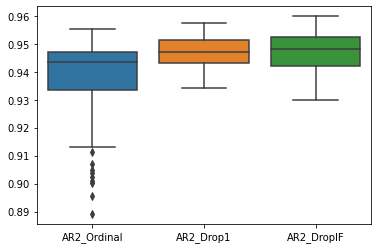

In [137]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

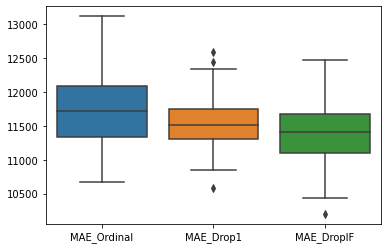

In [138]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);